An overview of the simulation results of the price + investment dynamics. This file is for generating the data and figures of experiments. We also refer to the simulations literature to check the ways to think about the stability and the robustness of the results under different random seeds (we picked 30 random seeds, each for 1000 times of simulations).

Combine the profit graphs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

%matplotlib inline

In [2]:
## Position
# position = r'C:\Users\zwang3\Downloads\DVC Experiments01_1\Exp06' # Exp02
position = r'C:\Users\zwang3\sciebo\Work_NewPC\Files_for_Epoc\Ideas\Main Work\Coding_DVC3\DVC Experiments02_nd1\Exp01'

In [3]:
## Import the data

price_a = pd.read_csv(position + '/prices001 (1).csv', names = list(range(1001)),
                      index_col = False)
price_b = pd.read_csv(position + '/prices_b001 (1).csv', names = list(range(1001)),
                      index_col = False)
inv_a = pd.read_csv(position + '/inv_a_list_new (1).csv', names = list(range(1001)),
                      index_col = False)
inv_b = pd.read_csv(position + '/inv_b_list_new (1).csv', names = list(range(1001)),
                      index_col = False)
prf_a = pd.read_csv(position + '/profit_a_list_new (1).csv', names = list(range(1001)),
                      index_col = False)
prf_b = pd.read_csv(position + '/profit_b_list_new (1).csv', names = list(range(1001)),
                      index_col = False)
welf_a = pd.read_csv(position + '/welf_a_list_new (1).csv', names = list(range(1001)),
                      index_col = False)
welf_b = pd.read_csv(position + '/welf_b_list_new (1).csv', names = list(range(1001)),
                      index_col = False)

30 random seeds, for each time period, we have no information about the variance of the population, so we consider using $t_{n-1; \alpha / 2}$ ($df = n-1 = 29$)

In [4]:
## critical t value
t_stat_5 = scipy.stats.t.ppf(q=1-.025,df=29) # alpha is equal to 5%

In [5]:
inv_a_mean = []; inv_b_mean = []
welf_a_mean = []; welf_b_mean = []

for i in range(1000):
  inv_a_mean.append(np.mean(inv_a.loc[:,i]))
  inv_b_mean.append(np.mean(inv_b.loc[:,i]))
  welf_a_mean.append(np.mean(welf_a.loc[:,i]))
  welf_b_mean.append(np.mean(welf_b.loc[:,i]))

In [6]:
welf_mean = np.array(welf_a_mean) + np.array(welf_b_mean)

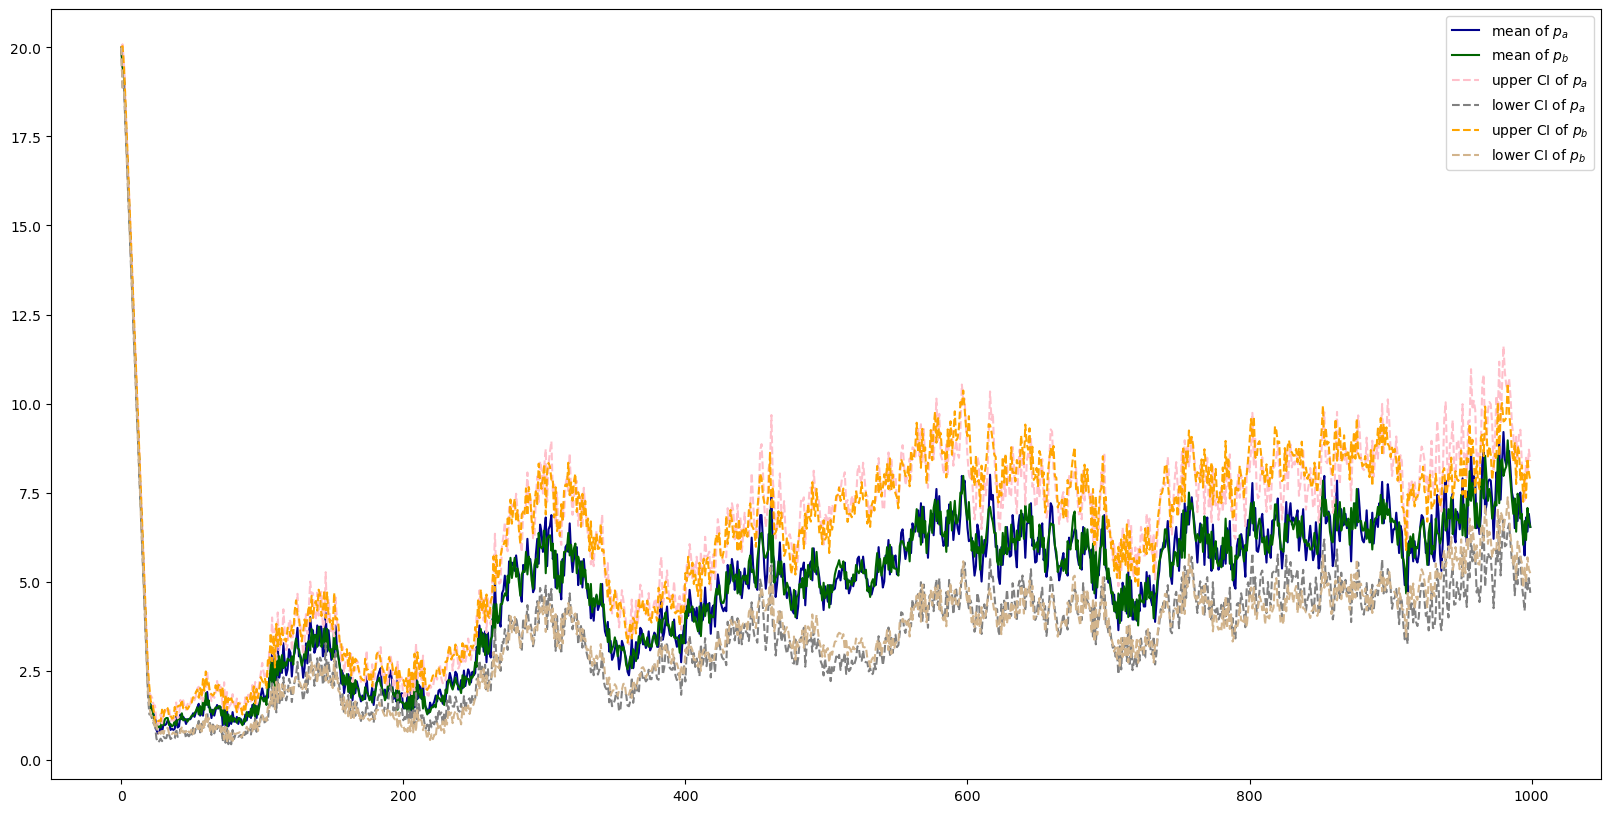

In [7]:
## statistics of a specific time period
price_a_mean = []
price_a_min = []
price_a_quartile1 = []
price_a_median = []
price_a_quartile3 = []
price_a_max = []
price_a_std = []

for i in range(1000):
  price_a_mean.append(np.mean(price_a.loc[:,i]))
  price_a_min.append(np.min(price_a.loc[:,i]))
  price_a_quartile1.append(np.percentile(price_a.loc[:,i], 25))
  price_a_median.append(np.median(price_a.loc[:,i]))
  price_a_quartile3.append(np.percentile(price_a.loc[:,i], 75))
  price_a_max.append(np.max(price_a.loc[:,i]))
  price_a_std.append(np.std(price_a.loc[:,i]))

price_a_ste = price_a_std /np.sqrt(30) # standard error, price_a_std/np.sqrt(n)
price_a_ci_up = price_a_mean + price_a_ste * t_stat_5
price_a_ci_lw = price_a_mean - price_a_ste * t_stat_5

price_b_mean = []
price_b_min = []
price_b_quartile1 = []
price_b_median = []
price_b_quartile3 = []
price_b_max = []
price_b_std = []

for i in range(1000):
  price_b_mean.append(np.mean(price_b.loc[:,i]))
  price_b_min.append(np.min(price_b.loc[:,i]))
  price_b_quartile1.append(np.percentile(price_b.loc[:,i], 25))
  price_b_median.append(np.median(price_b.loc[:,i]))
  price_b_quartile3.append(np.percentile(price_b.loc[:,i], 75))
  price_b_max.append(np.max(price_b.loc[:,i]))
  price_b_std.append(np.std(price_b.loc[:,i]))

price_b_ste = price_b_std /np.sqrt(30) # standard error, price_b_std/np.sqrt(n)
price_b_ci_up = price_b_mean + price_b_ste * t_stat_5
price_b_ci_lw = price_b_mean - price_b_ste * t_stat_5

plt.figure(figsize = [20,10])
plt.plot(price_a_mean, color = 'darkblue')
plt.plot(price_b_mean, color = 'darkgreen')

plt.plot(price_a_ci_up, '--', color = 'pink')
plt.plot(price_a_ci_lw, '--', color = 'grey')

plt.plot(price_b_ci_up, '--', color = 'orange')
plt.plot(price_b_ci_lw, '--', color = 'tan')

plt.legend(['mean of $p_a$', 'mean of $p_b$',
            'upper CI of $p_a$',
            'lower CI of $p_a$',
            'upper CI of $p_b$',
            'lower CI of $p_b$',
           ])
plt.show()

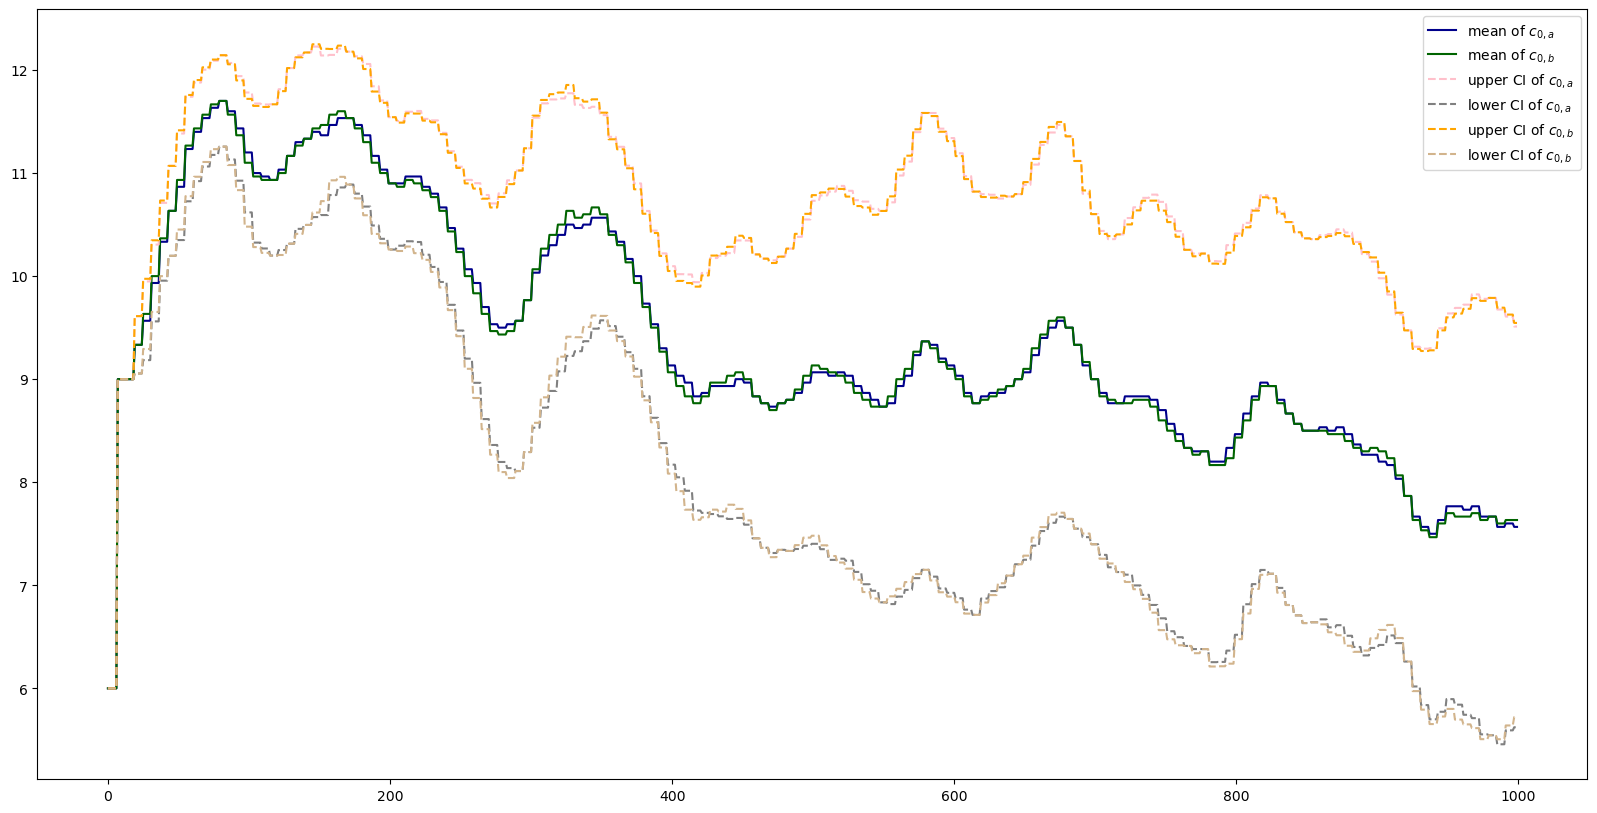

In [8]:
## statistics of a specific time period
inv_a_mean = []
inv_a_min = []
inv_a_quartile1 = []
inv_a_median = []
inv_a_quartile3 = []
inv_a_max = []
inv_a_std = []

for i in range(1000):
  inv_a_mean.append(np.mean(inv_a.loc[:,i]))
  inv_a_min.append(np.min(inv_a.loc[:,i]))
  inv_a_quartile1.append(np.percentile(inv_a.loc[:,i], 25))
  inv_a_median.append(np.median(inv_a.loc[:,i]))
  inv_a_quartile3.append(np.percentile(inv_a.loc[:,i], 75))
  inv_a_max.append(np.max(inv_a.loc[:,i]))
  inv_a_std.append(np.std(inv_a.loc[:,i]))

inv_a_ste = inv_a_std /np.sqrt(30) # standard error, inv_a_std/np.sqrt(n)
inv_a_ci_up = inv_a_mean + inv_a_ste * t_stat_5
inv_a_ci_lw = inv_a_mean - inv_a_ste * t_stat_5

inv_b_mean = []
inv_b_min = []
inv_b_quartile1 = []
inv_b_median = []
inv_b_quartile3 = []
inv_b_max = []
inv_b_std = []

for i in range(1000):
  inv_b_mean.append(np.mean(inv_b.loc[:,i]))
  inv_b_min.append(np.min(inv_b.loc[:,i]))
  inv_b_quartile1.append(np.percentile(inv_b.loc[:,i], 25))
  inv_b_median.append(np.median(inv_b.loc[:,i]))
  inv_b_quartile3.append(np.percentile(inv_b.loc[:,i], 75))
  inv_b_max.append(np.max(inv_b.loc[:,i]))
  inv_b_std.append(np.std(inv_b.loc[:,i]))

inv_b_ste = inv_b_std /np.sqrt(30) # standard error, inv_b_std/np.sqrt(n)
inv_b_ci_up = inv_b_mean + inv_b_ste * t_stat_5
inv_b_ci_lw = inv_b_mean - inv_b_ste * t_stat_5

plt.figure(figsize = [20,10])
plt.plot(inv_a_mean, color = 'darkblue')
plt.plot(inv_b_mean, color = 'darkgreen')

plt.plot(inv_a_ci_up, '--', color = 'pink')
plt.plot(inv_a_ci_lw, '--', color = 'grey')

plt.plot(inv_b_ci_up, '--', color = 'orange')
plt.plot(inv_b_ci_lw, '--', color = 'tan')

plt.legend(['mean of $c_{0,a}$', 'mean of $c_{0,b}$',
            'upper CI of $c_{0,a}$',
            'lower CI of $c_{0,a}$',
            'upper CI of $c_{0,b}$',
            'lower CI of $c_{0,b}$',
           ])
plt.show()

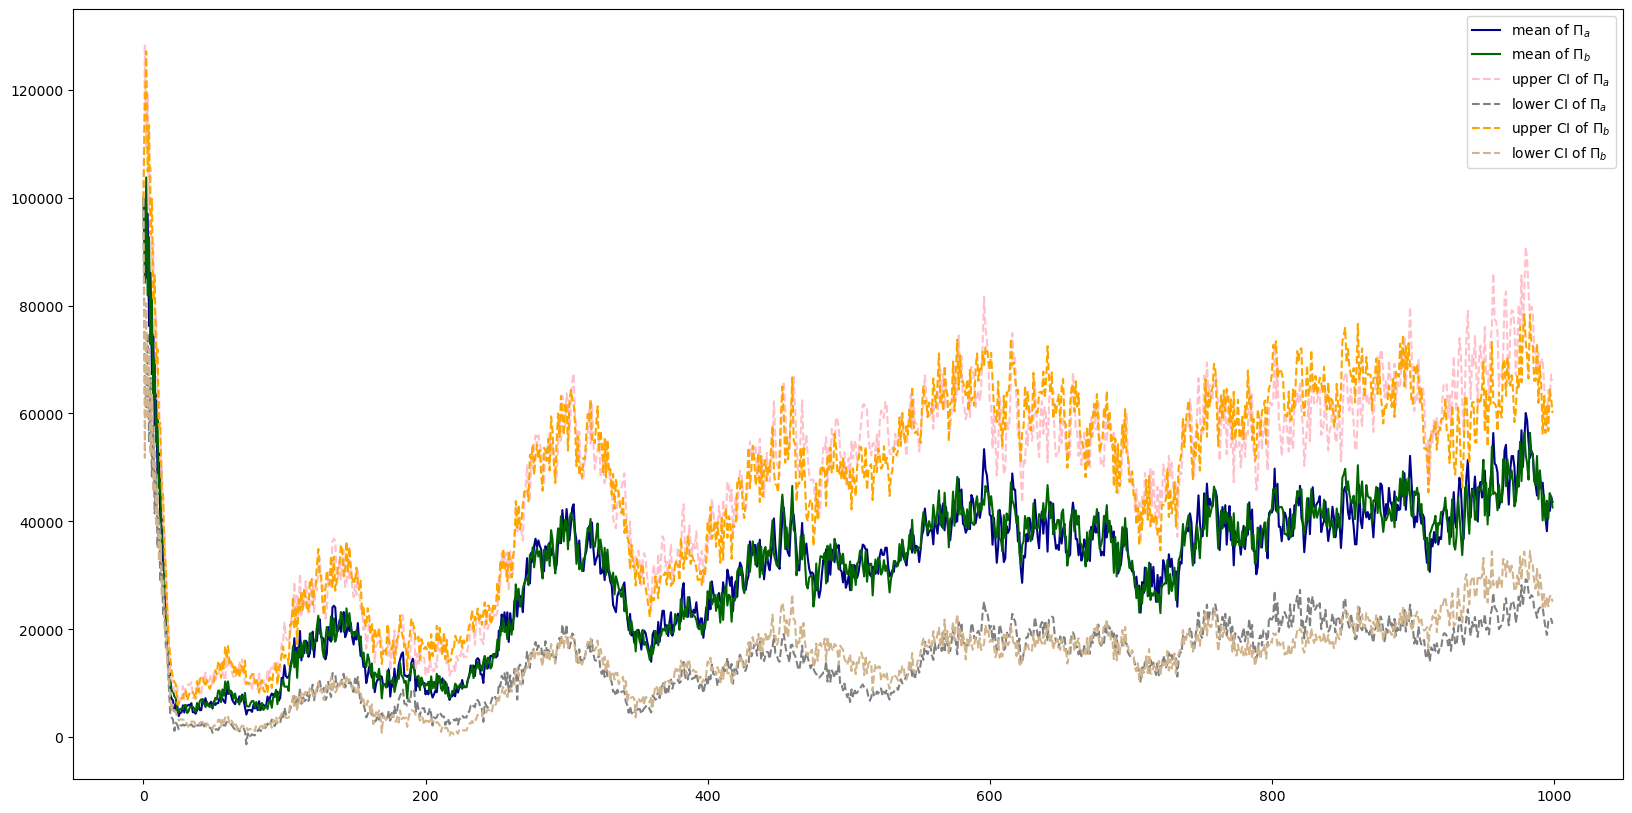

In [9]:
prf_a_mean = []
prf_a_min = []
prf_a_quartile1 = []
prf_a_median = []
prf_a_quartile3 = []
prf_a_max = []
prf_a_std = []

for i in range(1000):
  prf_a_mean.append(np.mean(prf_a.loc[:,i]))
  prf_a_min.append(np.min(prf_a.loc[:,i]))
  prf_a_quartile1.append(np.percentile(prf_a.loc[:,i], 25))
  prf_a_median.append(np.median(prf_a.loc[:,i]))
  prf_a_quartile3.append(np.percentile(prf_a.loc[:,i], 75))
  prf_a_max.append(np.max(prf_a.loc[:,i]))
  prf_a_std.append(np.std(prf_a.loc[:,i]))

prf_a_ste = prf_a_std /np.sqrt(30) # standard error, prf_a_std/np.sqrt(n)
prf_a_ci_up = prf_a_mean + prf_a_ste * t_stat_5
prf_a_ci_lw = prf_a_mean - prf_a_ste * t_stat_5

prf_b_mean = []
prf_b_min = []
prf_b_quartile1 = []
prf_b_median = []
prf_b_quartile3 = []
prf_b_max = []
prf_b_std = []

for i in range(1000):
  prf_b_mean.append(np.mean(prf_b.loc[:,i]))
  prf_b_min.append(np.min(prf_b.loc[:,i]))
  prf_b_quartile1.append(np.percentile(prf_b.loc[:,i], 25))
  prf_b_median.append(np.median(prf_b.loc[:,i]))
  prf_b_quartile3.append(np.percentile(prf_b.loc[:,i], 75))
  prf_b_max.append(np.max(prf_b.loc[:,i]))
  prf_b_std.append(np.std(prf_b.loc[:,i]))

prf_b_ste = prf_b_std /np.sqrt(30) # standard error, prf_b_std/np.sqrt(n)
prf_b_ci_up = prf_b_mean + prf_b_ste * t_stat_5
prf_b_ci_lw = prf_b_mean - prf_b_ste * t_stat_5

plt.figure(figsize = [20,10])
plt.plot(prf_a_mean, color = 'darkblue')
plt.plot(prf_b_mean, color = 'darkgreen')

plt.plot(prf_a_ci_up, '--', color = 'pink')
plt.plot(prf_a_ci_lw, '--', color = 'grey')

plt.plot(prf_b_ci_up, '--', color = 'orange')
plt.plot(prf_b_ci_lw, '--', color = 'tan')

plt.legend(['mean of $\Pi_a$', 'mean of $\Pi_b$',
            'upper CI of $\Pi_a$',
            'lower CI of $\Pi_a$',
            'upper CI of $\Pi_b$',
            'lower CI of $\Pi_b$',
           ])
plt.show()

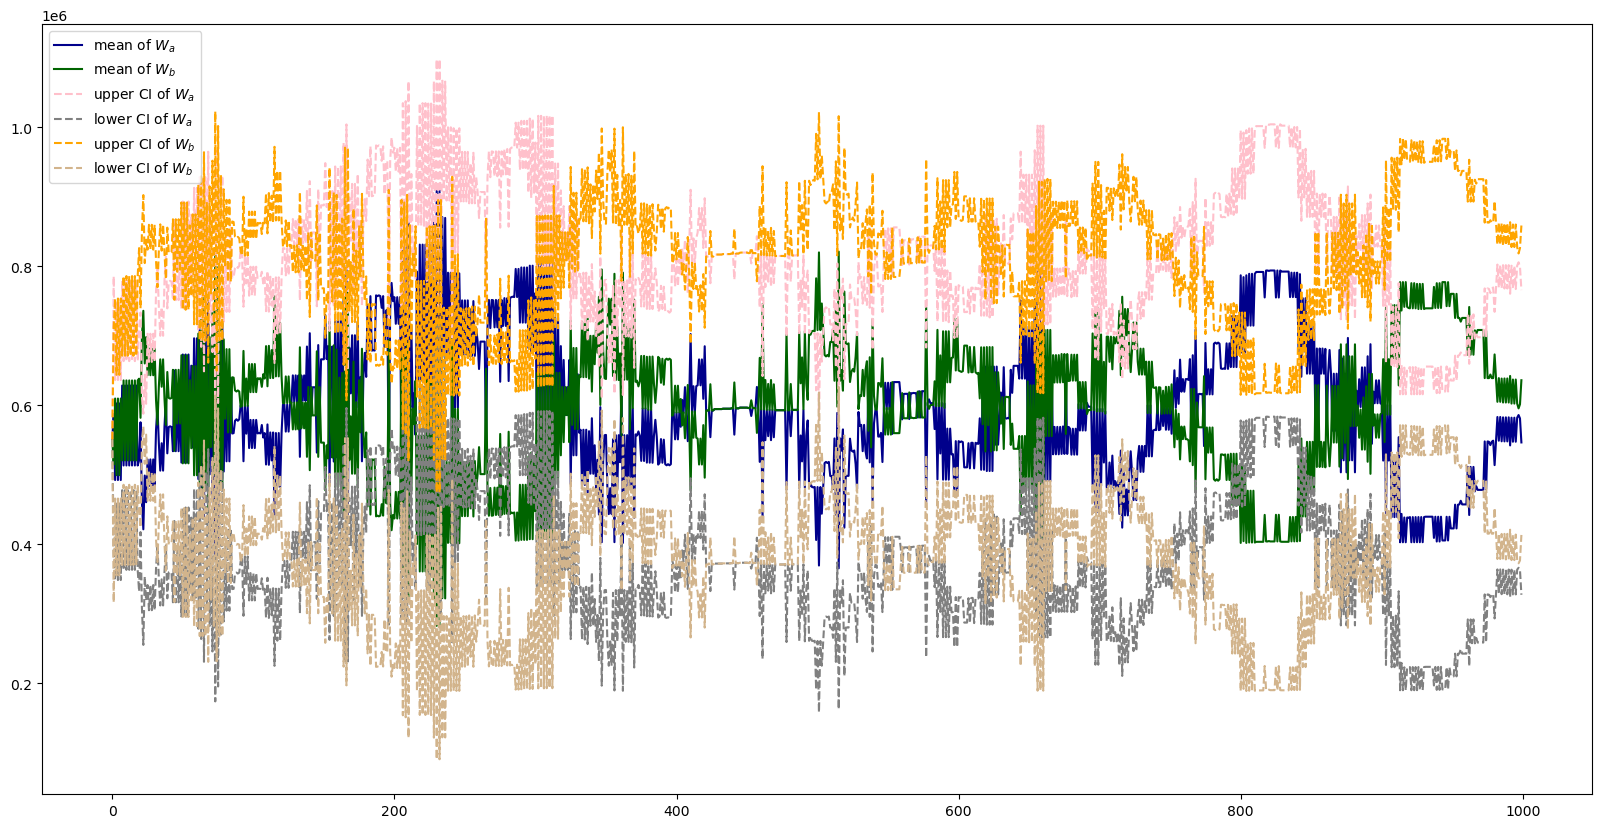

In [10]:
welf_a_mean = []
welf_a_min = []
welf_a_quartile1 = []
welf_a_median = []
welf_a_quartile3 = []
welf_a_max = []
welf_a_std = []

for i in range(1000):
  welf_a_mean.append(np.mean(welf_a.loc[:,i]))
  welf_a_min.append(np.min(welf_a.loc[:,i]))
  welf_a_quartile1.append(np.percentile(welf_a.loc[:,i], 25))
  welf_a_median.append(np.median(welf_a.loc[:,i]))
  welf_a_quartile3.append(np.percentile(welf_a.loc[:,i], 75))
  welf_a_max.append(np.max(welf_a.loc[:,i]))
  welf_a_std.append(np.std(welf_a.loc[:,i]))

welf_a_ste = welf_a_std /np.sqrt(30) # standard error, welf_a_std/np.sqrt(n)
welf_a_ci_up = welf_a_mean + welf_a_ste * t_stat_5
welf_a_ci_lw = welf_a_mean - welf_a_ste * t_stat_5

welf_b_mean = []
welf_b_min = []
welf_b_quartile1 = []
welf_b_median = []
welf_b_quartile3 = []
welf_b_max = []
welf_b_std = []

for i in range(1000):
  welf_b_mean.append(np.mean(welf_b.loc[:,i]))
  welf_b_min.append(np.min(welf_b.loc[:,i]))
  welf_b_quartile1.append(np.percentile(welf_b.loc[:,i], 25))
  welf_b_median.append(np.median(welf_b.loc[:,i]))
  welf_b_quartile3.append(np.percentile(welf_b.loc[:,i], 75))
  welf_b_max.append(np.max(welf_b.loc[:,i]))
  welf_b_std.append(np.std(welf_b.loc[:,i]))

welf_b_ste = welf_b_std /np.sqrt(30) # standard error, welf_b_std/np.sqrt(n)
welf_b_ci_up = welf_b_mean + welf_b_ste * t_stat_5
welf_b_ci_lw = welf_b_mean - welf_b_ste * t_stat_5


plt.figure(figsize = [20,10])
plt.plot(welf_a_mean, color = 'darkblue')
plt.plot(welf_b_mean, color = 'darkgreen')

plt.plot(welf_a_ci_up, '--', color = 'pink')
plt.plot(welf_a_ci_lw, '--', color = 'grey')

plt.plot(welf_b_ci_up, '--', color = 'orange')
plt.plot(welf_b_ci_lw, '--', color = 'tan')

plt.legend(['mean of $W_a$', 'mean of $W_b$',
            'upper CI of $W_a$',
            'lower CI of $W_a$',
            'upper CI of $W_b$',
            'lower CI of $W_b$',
            ])
plt.show()

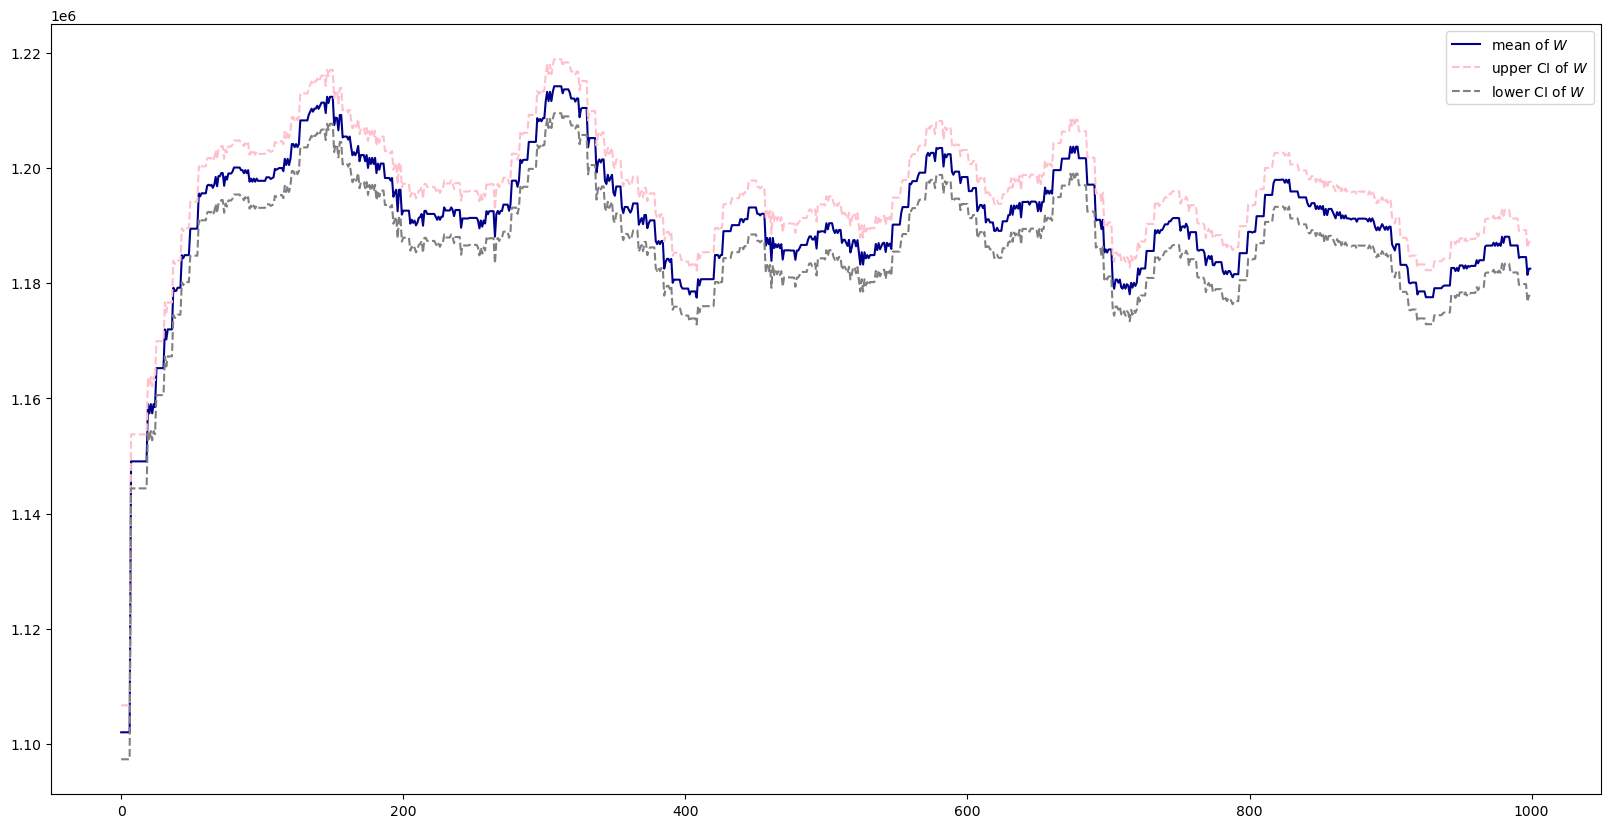

In [11]:
welf_total = np.array(welf_a_mean) + np.array(welf_b_mean)
welf_total_std = np.std(welf_total)
welf_total_ste = welf_total_std / np.sqrt(30)
welf_total_ci_up = welf_total + welf_total_ste * t_stat_5
welf_total_ci_lw = welf_total - welf_total_ste * t_stat_5

plt.figure(figsize = [20,10])
plt.plot(welf_total, color = 'darkblue')

plt.plot(welf_total_ci_up, '--', color = 'pink')
plt.plot(welf_total_ci_lw, '--', color = 'grey')

plt.legend(['mean of $W$', 
            'upper CI of $W$',
            'lower CI of $W$',
            ])
plt.show()

In [12]:
# welf_total == welf_mean

In [13]:
position

'C:\\Users\\zwang3\\sciebo\\Work_NewPC\\Files_for_Epoc\\Ideas\\Main Work\\Coding_DVC3\\DVC Experiments02_nd1\\Exp01'

To study the correlation of variables, we can check the cross-correlation matrix. There are two ways to check it

- Draw the correlation matrix of the mean of the variables.

- Find the correlation matrix under one random seed, and take the average of the values for all the random seeds.

<Axes: >

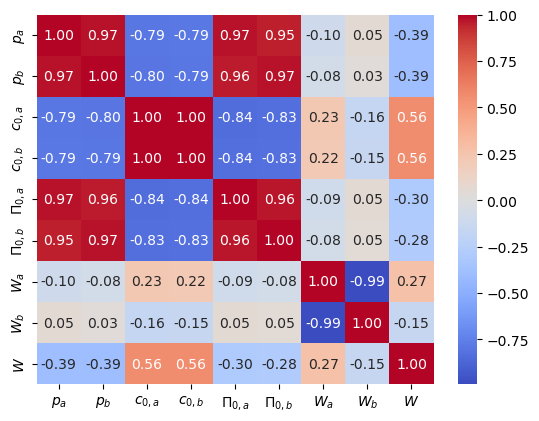

In [14]:
## 1

data = {
    '$p_a$': price_a_mean,
    '$p_b$': price_b_mean,
    '$c_{0,a}$': inv_a_mean,
    '$c_{0,b}$': inv_b_mean,
    '$\Pi_{0,a}$': prf_a_mean,
    '$\Pi_{0,b}$': prf_b_mean,
    '$W_{a}$': welf_a_mean,
    '$W_{b}$': welf_b_mean,
    '$W$': welf_mean
    }

df = pd.DataFrame(data)

# Compute the correlation matrix
corr_matrix = df.corr()

# Use Seaborn to create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')

<Axes: >

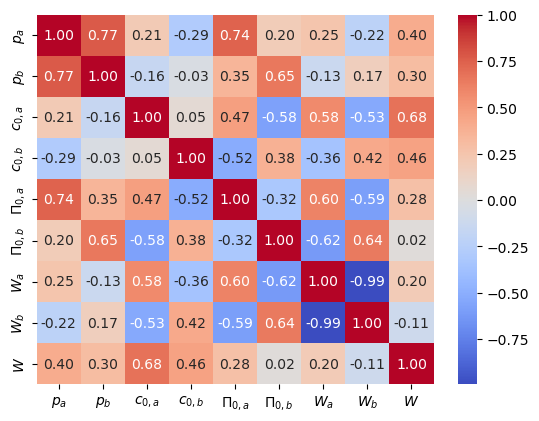

In [15]:
## 2 (label: ..._new)

data = {
    '$p_a$': price_a.loc[0,:],
    '$p_b$': price_b.loc[0,:],
    '$c_{0,a}$': inv_a.loc[0,:],
    '$c_{0,b}$': inv_b.loc[0,:],
    '$\Pi_{0,a}$': prf_a.loc[0,:],
    '$\Pi_{0,b}$': prf_b.loc[0,:],
    '$W_{a}$': welf_a.loc[0,:],
    '$W_{b}$': welf_b.loc[0,:],
    '$W$': np.array(welf_a.loc[0,:]) + np.array(welf_b.loc[0,:])
    }

df = pd.DataFrame(data).copy()
corr_matrix = df.corr().copy()

for i in range(1,30):
    data = {
    '$p_a$': price_a.loc[i,:],
    '$p_b$': price_b.loc[i,:],
    '$c_{0,a}$': inv_a.loc[i,:],
    '$c_{0,b}$': inv_b.loc[i,:],
    '$\Pi_{0,a}$': prf_a.loc[i,:],
    '$\Pi_{0,b}$': prf_b.loc[i,:],
    '$W_{a}$': welf_a.loc[i,:],
    '$W_{b}$': welf_b.loc[i,:],
    '$W$': np.array(welf_a.loc[i,:]) + np.array(welf_b.loc[i,:])
    }
    
    df = pd.DataFrame(data).copy()
    corr_matrix = corr_matrix + df.corr().copy()
    
corr_matrix_new = corr_matrix/30
sns.heatmap(corr_matrix_new, annot=True, fmt='.2f', cmap='coolwarm')

We think the 2nd way makes more sense, since the investment in $a$ should not be negatively correlated with its profit overall.

In [501]:
## Below needs checking

In [30]:
def nth_order_autocorrelation(time_series, n):
    # Normalize the time series
    time_series = np.array(time_series)
    mean_normalized_series = time_series - np.mean(time_series)
    
    # Calculate autocorrelation for lag n
    numerator = np.sum(mean_normalized_series[:-n] * mean_normalized_series[n:]) # n steps ahead
    denominator = np.sum(mean_normalized_series ** 2)
    
    autocorrelation = numerator / denominator
    return autocorrelation

In [163]:
## For other scenarios

position0 = r'C:\Users\zwang3\Downloads\DVC Experiments01_1\Exp07' # Exp02
# data_collected = pd.read_csv(position0 + '/stats01.csv')
price_a = pd.read_csv(position0 + '/prices001 (1).csv', names = list(range(1001)),
                      index_col = False)

In [164]:
## Examples with random seeds
autocor1_list = []
autocor2_list = []
autocor3_list = []
autocor4_list = []
autocor5_list = []
autocor6_list = []
autocor7_list = []

for i in range(30):
    example_list = price_a.loc[i,:].tolist()
    autocor1_list.append(nth_order_autocorrelation(example_list, 1))
    autocor2_list.append(nth_order_autocorrelation(example_list, 2))
    autocor3_list.append(nth_order_autocorrelation(example_list, 3))
    autocor4_list.append(nth_order_autocorrelation(example_list, 4))
    autocor5_list.append(nth_order_autocorrelation(example_list, 5))
    autocor6_list.append(nth_order_autocorrelation(example_list, 6))
    autocor7_list.append(nth_order_autocorrelation(example_list, 7))

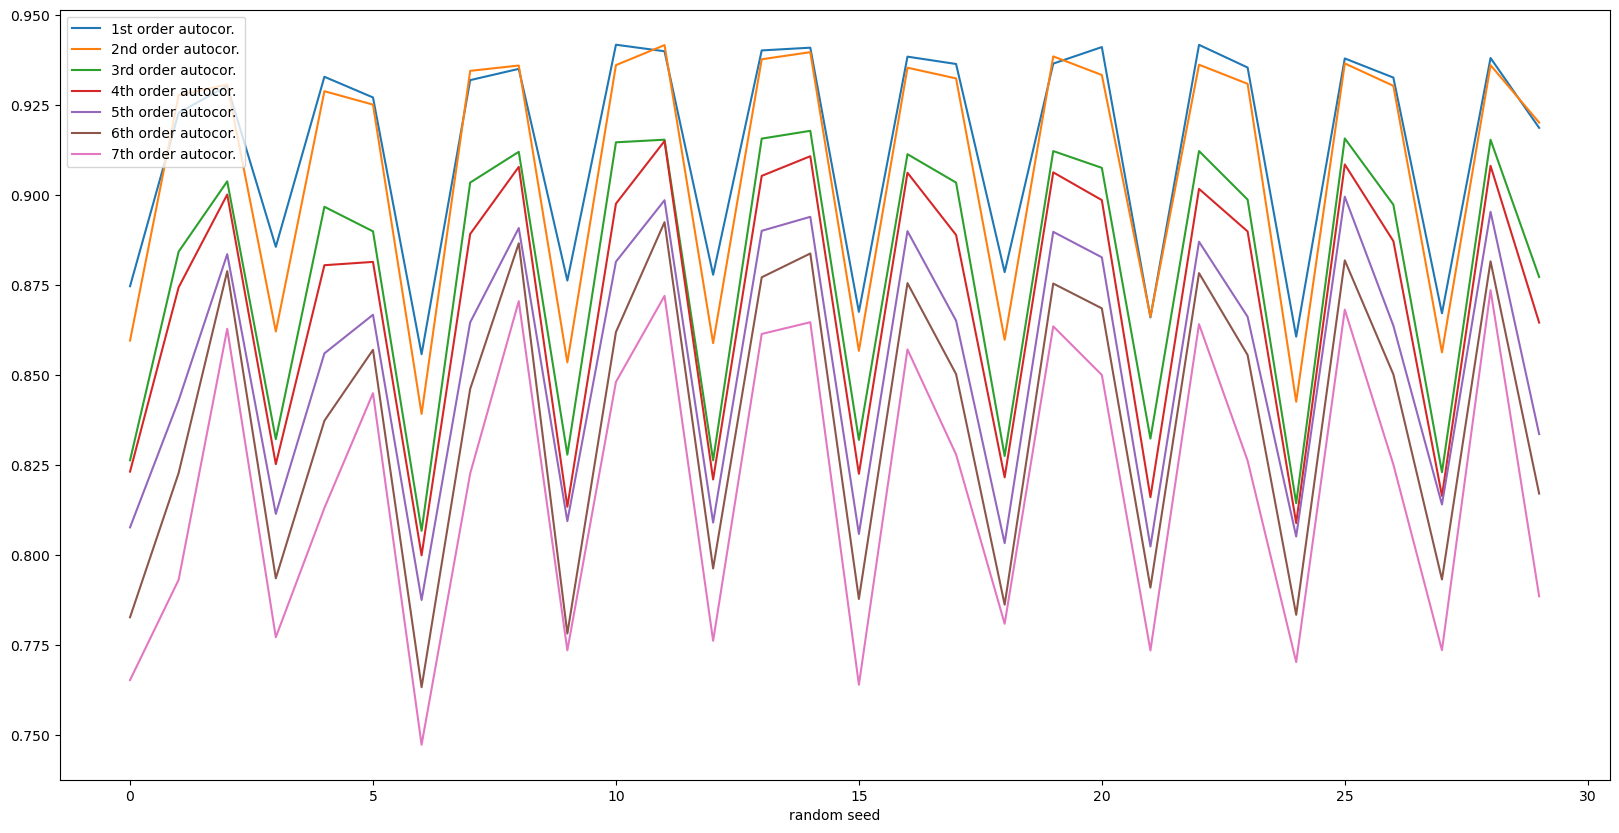

In [165]:
plt.figure(figsize = [20,10]) ## price_a
plt.plot(autocor1_list)
plt.plot(autocor2_list)
plt.plot(autocor3_list)
plt.plot(autocor4_list)
plt.plot(autocor5_list)
plt.plot(autocor6_list)
plt.plot(autocor7_list)

# plt.title('Autocorrelation of example price time series under different random seeds')
plt.xlabel('random seed')

plt.legend(['1st order autocor.', '2nd order autocor.', 
            '3rd order autocor.', '4th order autocor.',
            '5th order autocor.', '6th order autocor.',
            '7th order autocor.'], loc = 2)
plt.show()

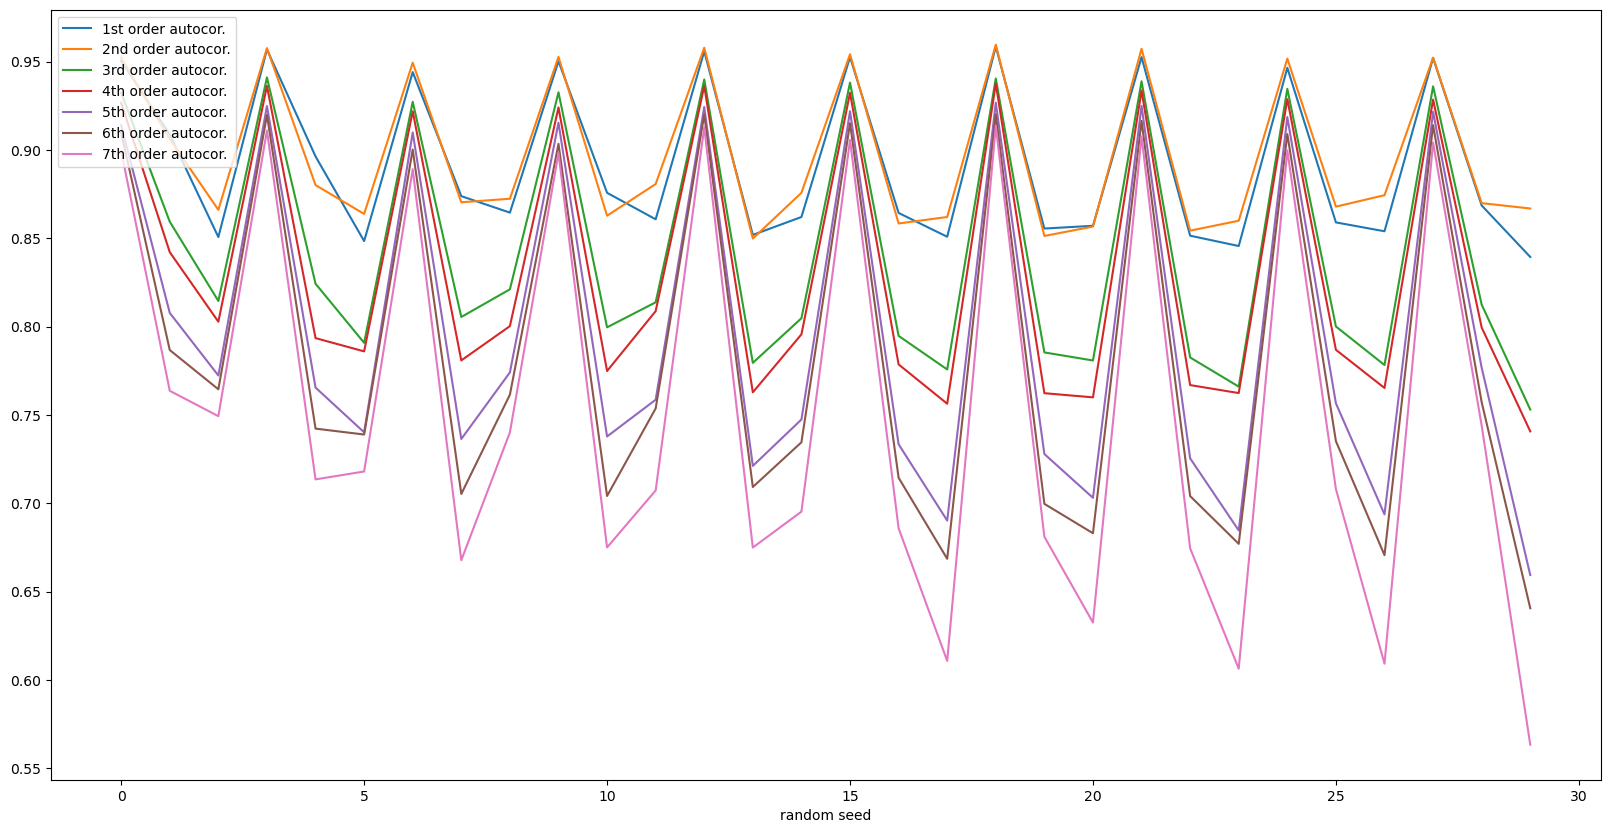

In [166]:
price_b = pd.read_csv(position0 + '/prices_b001 (1).csv', names = list(range(1001)),
                      index_col = False)

## Examples with random seeds
autocor1_list = []
autocor2_list = []
autocor3_list = []
autocor4_list = []
autocor5_list = []
autocor6_list = []
autocor7_list = []

for i in range(30):
    example_list = price_b.loc[i,:].tolist()
    autocor1_list.append(nth_order_autocorrelation(example_list, 1))
    autocor2_list.append(nth_order_autocorrelation(example_list, 2))
    autocor3_list.append(nth_order_autocorrelation(example_list, 3))
    autocor4_list.append(nth_order_autocorrelation(example_list, 4))
    autocor5_list.append(nth_order_autocorrelation(example_list, 5))
    autocor6_list.append(nth_order_autocorrelation(example_list, 6))
    autocor7_list.append(nth_order_autocorrelation(example_list, 7))
    
plt.figure(figsize = [20,10]) ## price_b
plt.plot(autocor1_list)
plt.plot(autocor2_list)
plt.plot(autocor3_list)
plt.plot(autocor4_list)
plt.plot(autocor5_list)
plt.plot(autocor6_list)
plt.plot(autocor7_list)

# plt.title('Autocorrelation of example price time series under different random seeds')
plt.xlabel('random seed')

plt.legend(['1st order autocor.', '2nd order autocor.', 
            '3rd order autocor.', '4th order autocor.',
            '5th order autocor.', '6th order autocor.',
            '7th order autocor.'], loc = 2)
plt.show()

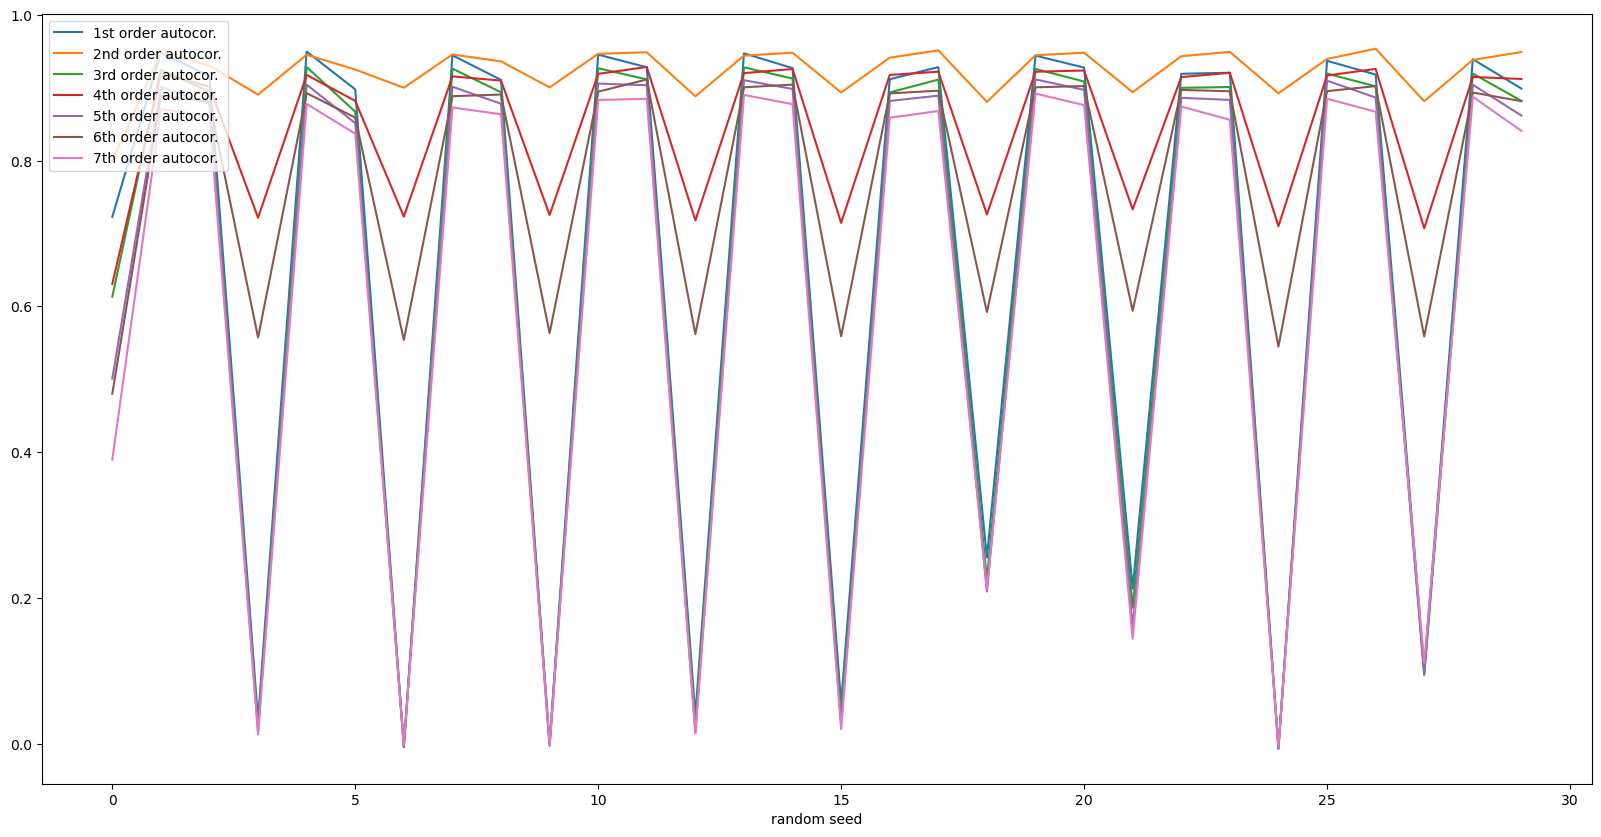

In [167]:
prf_a = pd.read_csv(position0 + '/profit_a_list_new (1).csv', names = list(range(1001)),
                      index_col = False)

## Examples with random seeds
autocor1_list = []
autocor2_list = []
autocor3_list = []
autocor4_list = []
autocor5_list = []
autocor6_list = []
autocor7_list = []

for i in range(30):
    example_list = prf_a.loc[i,:].tolist()
    autocor1_list.append(nth_order_autocorrelation(example_list, 1))
    autocor2_list.append(nth_order_autocorrelation(example_list, 2))
    autocor3_list.append(nth_order_autocorrelation(example_list, 3))
    autocor4_list.append(nth_order_autocorrelation(example_list, 4))
    autocor5_list.append(nth_order_autocorrelation(example_list, 5))
    autocor6_list.append(nth_order_autocorrelation(example_list, 6))
    autocor7_list.append(nth_order_autocorrelation(example_list, 7))
    
plt.figure(figsize = [20,10]) ## profit_a
plt.plot(autocor1_list)
plt.plot(autocor2_list)
plt.plot(autocor3_list)
plt.plot(autocor4_list)
plt.plot(autocor5_list)
plt.plot(autocor6_list)
plt.plot(autocor7_list)

# plt.title('Autocorrelation of example profit time series under different random seeds')
plt.xlabel('random seed')

plt.legend(['1st order autocor.', '2nd order autocor.', 
            '3rd order autocor.', '4th order autocor.',
            '5th order autocor.', '6th order autocor.',
            '7th order autocor.'], loc = 2)
plt.show()

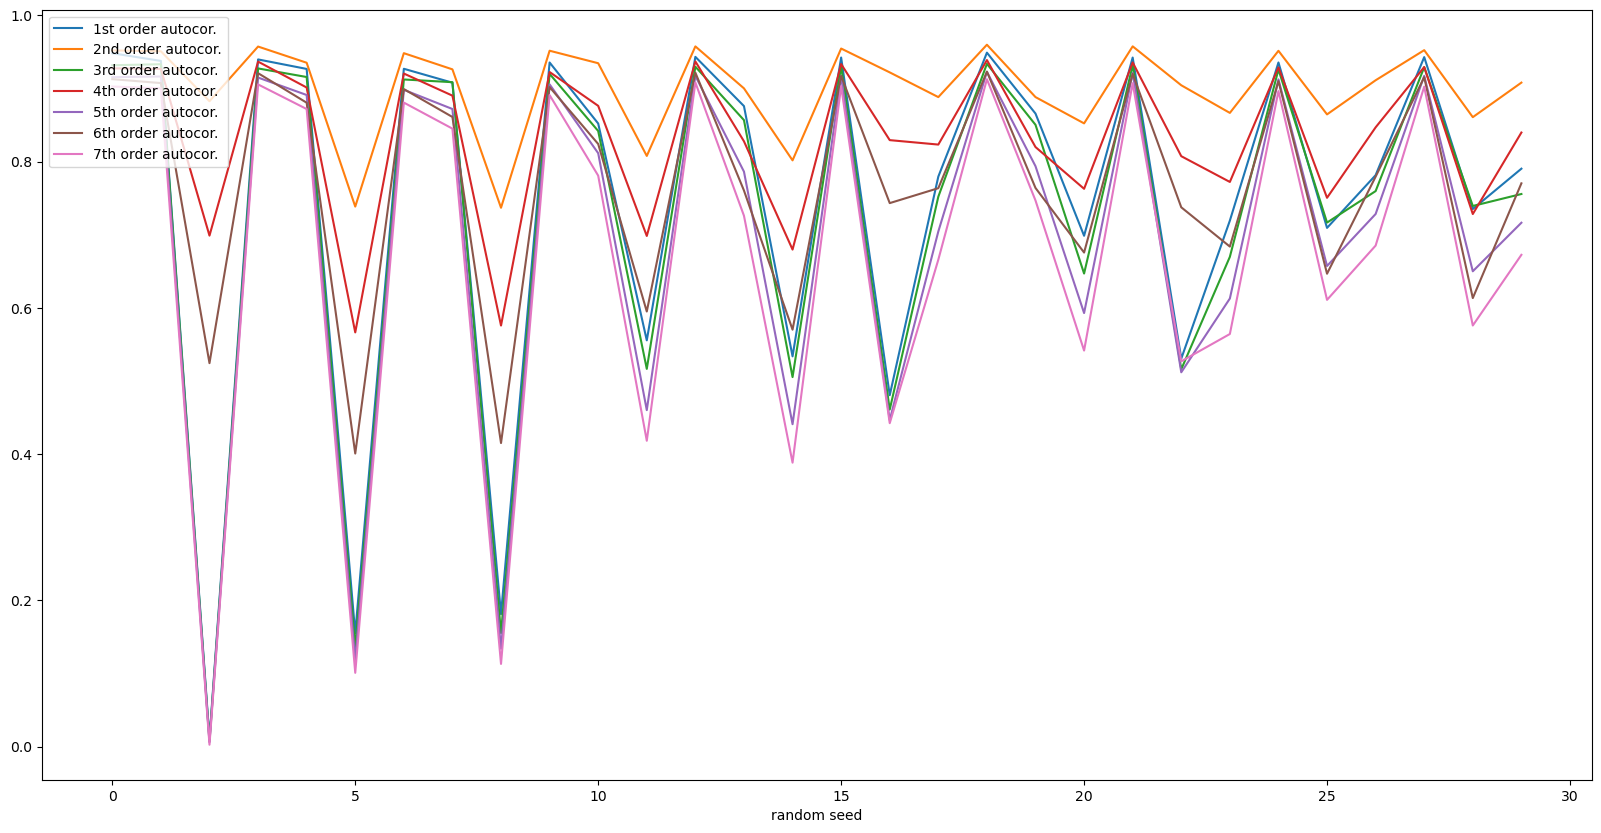

In [168]:
prf_b = pd.read_csv(position0 + '/profit_b_list_new (1).csv', names = list(range(1001)),
                      index_col = False)

## Examples with random seeds
autocor1_list = []
autocor2_list = []
autocor3_list = []
autocor4_list = []
autocor5_list = []
autocor6_list = []
autocor7_list = []

for i in range(30):
    example_list = prf_b.loc[i,:].tolist()
    autocor1_list.append(nth_order_autocorrelation(example_list, 1))
    autocor2_list.append(nth_order_autocorrelation(example_list, 2))
    autocor3_list.append(nth_order_autocorrelation(example_list, 3))
    autocor4_list.append(nth_order_autocorrelation(example_list, 4))
    autocor5_list.append(nth_order_autocorrelation(example_list, 5))
    autocor6_list.append(nth_order_autocorrelation(example_list, 6))
    autocor7_list.append(nth_order_autocorrelation(example_list, 7))
    
plt.figure(figsize = [20,10]) ## profit_a
plt.plot(autocor1_list)
plt.plot(autocor2_list)
plt.plot(autocor3_list)
plt.plot(autocor4_list)
plt.plot(autocor5_list)
plt.plot(autocor6_list)
plt.plot(autocor7_list)

# plt.title('Autocorrelation of example profit time series under different random seeds')
plt.xlabel('random seed')

plt.legend(['1st order autocor.', '2nd order autocor.', 
            '3rd order autocor.', '4th order autocor.',
            '5th order autocor.', '6th order autocor.',
            '7th order autocor.'], loc = 2)
plt.show()

In [530]:
position0

NameError: name 'position0' is not defined

Combine the profit graphs